In [15]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid", font='Times New Roman', font_scale=1.)
# plt.rcParams["font.size"] = 12

In [16]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Times New Roman'
matplotlib.rcParams['mathtext.it'] = 'Times New Roman:italic'
matplotlib.rcParams['mathtext.bf'] = 'Times New Roman:bold'

In [17]:
def smooth(y, f=0.05):
    """Applies box filter smoothing to array `y` with fraction `f`, yielding a smoothed array."""
    nf = round(len(y) * f * 2) // 2 + 1  # number of filter elements (must be odd)
    p = np.ones(nf // 2)  # ones padding
    yp = np.concatenate((p * y[0], y, p * y[-1]), 0)  # y padded
    return np.convolve(yp, np.ones(nf) / nf, mode="valid")  # y-smoothed

In [18]:
def plot_pr_curve(px, py, ap, save_dir=Path("pr_curve.png"), names=()):
    """Plots precision-recall curve, optionally per class, saving to `save_dir`; `px`, `py` are lists, `ap` is Nx2
    array, `names` optional.
    """
    fig, ax = plt.subplots(1, 1, figsize=(9, 6), tight_layout=True)
    py = np.stack(py, axis=1)

    if 0 < len(names) < 21:  # display per-class legend if < 21 classes
        for i, y in enumerate(py.T):
            ax.plot(px, y, linewidth=1, label=f"{names[i]} {ap[i, 0]:.3f}")  # plot(recall, precision)
    else:
        ax.plot(px, py, linewidth=1, color="grey")  # plot(recall, precision)

    ax.plot(px, py.mean(1), linewidth=3, color="blue", label="all classes %.3f mAP@0.5" % ap[:, 0].mean())
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    ax.set_title("Precision-Recall Curve")
    fig.savefig(save_dir, dpi=250)
    fig.savefig(save_dir.with_suffix('.pdf'))
    plt.close(fig)

In [41]:
def plot_mc_curve(px, py, angular_size, save_dir, names=(), ylabel="Metric"):
    """Plots a metric-confidence curve for model predictions, supporting per-class visualization and smoothing."""
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    ax.set_aspect('equal')
    # np.save(save_dir.with_name('names'), names)
    # print('names', names)
    colors = ['#2C73D2', '#00C9A7']
    for i, y in enumerate(py):
        ax.plot(px, y, linewidth=1, label=f"{names[i]}", color=colors[i])  # plot(confidence, metric)

    y = smooth(py.mean(0), 0.05)
    ax.plot(px, y, linewidth=3, color="#FF9671", alpha=0.8, label=f"All classes, {y.max():.2f} at {px[y.argmax()]:.3f}")
    # ax.set_xlabel(rf'Confidence, where $\theta_{{AD}}={angular_size*30/3.87e-3:.2f}\theta_c$')
    ax.set_xlabel('Confidence')
    ax.set_ylabel(ylabel)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.legend(loc="best")
    # ax.set_title(f"{ylabel}-Confidence Curve")
    # fig.savefig(save_dir.with_suffix('.png'), dpi=250)
    # print(save_dir.with_suffix('.pdf'))
    fig.tight_layout()
    fig.savefig(save_dir, bbox_inches='tight')
    # plt.close(fig)

0.00025
0.00027


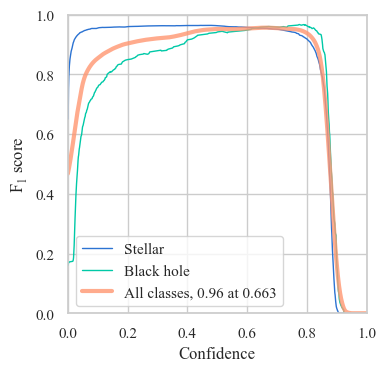

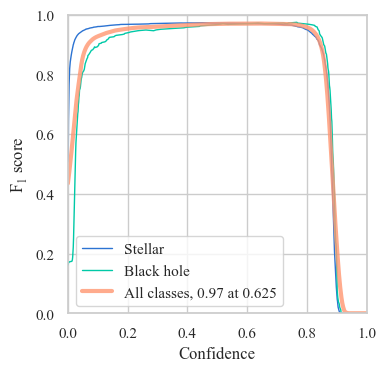

In [43]:
npy_path = Path('csv/np')
for i in npy_path.iterdir():
    # print(i.name
    px = np.load(i / 'x_F1.npy')
    py = np.load(i / 'y_F1.npy')
    # a = np.load(i)
    # print(a.shape)
# px = np.load('csv/np/x_F1.npy')
# py = np.load('csv/np/y_F1.npy')
    angular_size = float(i.name)
    plot_mc_curve(px, py, angular_size, names={0: 'Stellar', 1: 'Black hole'}, ylabel='F$_1$ score', save_dir=Path(f'images/F1_{i.name}.pdf'))
    print(angular_size)

In [21]:
a = 'star all'
a.title()

'Star All'